In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from wordcloud import WordCloud
import datetime

In [2]:
# Cargamos el df
BW_df = pd.read_csv('./Opiniones_maps.csv', encoding = "utf8")
BW_df

,Unnamed: 0,Usuario,Fecha,Descripción,Calificacion
0,0,Félix Coutiño,hace 6 meses en Google,Simplemente de mis mejores experiecias de hosp...,5/5
1,1,Alexandra Rendón Vega,un año atrás en Google,"Atención: Realmente mala, el que recibe en la ...",2/5
2,2,Sylv Gav,una semana atrás en Google,"Excelente, gracias para la hospitalidad y la a...",5/5
3,3,Gonzalo Chara,3 semanas atrás en Google,Muy cerca al zocalo y el trato del personal mu...,4/5
4,4,Blanca Sanchez,hace un mes en Google,"Excelente atención, aunque solo dure 1 noche ,...",5/5
...,...,...,...,...,...
925,925,Alejandro De la Cadena,3 años atrás en Google,Accesible,5/5
926,926,JuanCAgui94,3 años atrás en Google,Me gustó la terraza,5/5
927,927,Graciela Samayoa,3 años atrás en Google,siempre limpio y agradable,5/5
928,928,JESUS ISMAEL PECERO CRUZ,3 años atrás en Google,"El ambiente, el trato, las instalaciones son m...",5/5


In [3]:
# Vemos la información del dataset
BW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    930 non-null    int64 
 1   Usuario       930 non-null    object
 2   Fecha         930 non-null    object
 3   Descripción   930 non-null    object
 4   Calificacion  930 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.5+ KB


In [4]:
# Buscamos los 3  datos faltantes
BW_df[BW_df["Descripción"].isna()]

,Unnamed: 0,Usuario,Fecha,Descripción,Calificacion


In [5]:
# Rellenamos con los datos más proximo superior (ffill), podríamos tambien hacerlo con el dato más próximo inferior (backfill)
BW_df.dropna(inplace = True)

In [6]:
# Tranformemos la calificación a un número únicamente qie es el penúltimo de la cadena
calificaciones = []
for cali in BW_df['Calificacion']:
    calificaciones.append(cali[0])

In [7]:
BW_df["Calificacion"] = calificaciones

In [8]:
BW_df["Calificacion"] = BW_df["Calificacion"].astype(int)

In [9]:
BW_df

,Unnamed: 0,Usuario,Fecha,Descripción,Calificacion
0,0,Félix Coutiño,hace 6 meses en Google,Simplemente de mis mejores experiecias de hosp...,5
1,1,Alexandra Rendón Vega,un año atrás en Google,"Atención: Realmente mala, el que recibe en la ...",2
2,2,Sylv Gav,una semana atrás en Google,"Excelente, gracias para la hospitalidad y la a...",5
3,3,Gonzalo Chara,3 semanas atrás en Google,Muy cerca al zocalo y el trato del personal mu...,4
4,4,Blanca Sanchez,hace un mes en Google,"Excelente atención, aunque solo dure 1 noche ,...",5
...,...,...,...,...,...
925,925,Alejandro De la Cadena,3 años atrás en Google,Accesible,5
926,926,JuanCAgui94,3 años atrás en Google,Me gustó la terraza,5
927,927,Graciela Samayoa,3 años atrás en Google,siempre limpio y agradable,5
928,928,JESUS ISMAEL PECERO CRUZ,3 años atrás en Google,"El ambiente, el trato, las instalaciones son m...",5


In [10]:
# Eliminamos la columna Unnamed
BW_df.drop("Unnamed: 0", axis = 1, inplace = True)

In [11]:
# procesamos las fechas
palabras = ["Google", "en", "atrás", "hace", "Hoteles.com", "Expedia.mx", "Travelocity.com", "Orbitz.com", "Trip.com", "Ebookers.com"]
fechas = []

for fecha in BW_df["Fecha"]:
    lista = fecha.split()
    fechas_en_lista = [palabra for palabra in lista if palabra not in palabras]
    fechas.append(" ". join(fechas_en_lista))

In [12]:
fechas_corr = []
for fech in fechas:
    fechas_corr.append(fech.replace("una", "1").replace("un", "1").replace("años", "año").replace("meses", "mes").replace("semanas", "semana").replace("días", "día"))
    

fechas_corr

['6 mes',
 '1 año',
 '1 semana',
 '3 semana',
 '1 mes',
 '1 mes',
 '2 semana',
 '1 mes',
 '2 mes',
 '2 mes',
 '2 mes',
 '2 mes',
 '3 mes',
 '7 mes',
 '4 mes',
 '4 mes',
 '3 mes',
 '2 mes',
 '3 mes',
 '3 mes',
 '4 mes',
 '5 mes',
 '7 mes',
 '4 mes',
 '5 mes',
 '5 mes',
 '5 mes',
 '5 mes',
 '5 mes',
 '5 mes',
 '6 mes',
 '6 mes',
 '1 año',
 '4 mes',
 '1 mes',
 '1 año',
 '1 año',
 '1 año',
 '4 mes',
 '4 año',
 '6 mes',
 '1 año',
 '2 año',
 '3 semana',
 '1 año',
 '7 mes',
 '1 año',
 '8 mes',
 '7 mes',
 '6 mes',
 '1 año',
 '1 año',
 '1 año',
 '2 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '2 año',
 '1 año',
 '1 año',
 '1 año',
 '7 mes',
 '3 año',
 '1 año',
 '1 año',
 '1 año',
 '2 año',
 '1 año',
 '1 año',
 '7 mes',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '6 mes',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '8 mes',
 '4 mes',
 '1 año',
 '2 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '1 año',
 '2 año',
 '1 año',
 '1 año'

In [13]:
ahora = datetime.datetime.now()
print(ahora)

2021-04-11 22:20:57.410360


In [14]:
resta = ahora - datetime.timedelta(days = 1)
print(resta)

2021-04-10 22:20:57.410360


In [15]:
# poner la fecha
fechas_de_publicacion = []
for i, tiempo in enumerate(fechas_corr):
    lista_fecha = tiempo.split()
    
    if lista_fecha[1] == "día":
        cuanto = int(lista_fecha[0])
        date = ahora - datetime.timedelta(days = cuanto)
        fechas_de_publicacion.append(date)
        
    elif lista_fecha[1] == "semana":
        cuanto = int(lista_fecha[0])
        date = ahora - datetime.timedelta(days = cuanto*7)
        fechas_de_publicacion.append(date)
        
    elif lista_fecha[1] == "mes":
        cuanto = int(lista_fecha[0])
        date = ahora - datetime.timedelta(days = cuanto*30)
        fechas_de_publicacion.append(date)
        
    elif lista_fecha[1] == "año":
        cuanto = int(lista_fecha[0])
        date = ahora - datetime.timedelta(days = cuanto*365)
        fechas_de_publicacion.append(date)
        
    elif lista_fecha[1] == "horas":
        date = ahora - datetime.timedelta(days = 1)
        fechas_de_publicacion.append(date)
        
    else:
        print(lista_fecha[1])

In [16]:
fechas_de_publicacion[0]

datetime.datetime(2020, 10, 13, 22, 20, 57, 410360)

In [17]:
year = []
month = []
for mes_año in fechas_de_publicacion:
    year.append(mes_año.strftime('%Y'))
    month.append(mes_año.strftime('%m'))

In [18]:
meses_num = []
for mes in month:
    if mes[0] == str(0):
        meses_num.append(mes[1])
    else:
        meses_num.append(mes)

In [19]:
meses = {"enero": 1, "febrero": 2, "marzo": 3, "abril": 4, "mayo": 5, "junio": 6, "julio": 7, "agosto": 8, "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12}

In [20]:
meses_num

['10',
 '4',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '2',
 '2',
 '2',
 '1',
 '9',
 '12',
 '12',
 '1',
 '2',
 '1',
 '1',
 '12',
 '11',
 '9',
 '12',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '10',
 '10',
 '4',
 '12',
 '3',
 '4',
 '4',
 '4',
 '12',
 '4',
 '10',
 '4',
 '4',
 '3',
 '4',
 '9',
 '4',
 '8',
 '9',
 '10',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '9',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '9',
 '4',
 '4',
 '4',
 '4',
 '10',
 '4',
 '4',
 '4',
 '4',
 '4',
 '8',
 '12',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '12',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '10',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '9',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '1',
 '4',


In [21]:
# Agregamos al dataset
BW_df["Año"] = year
BW_df["Mes"] = month

In [22]:
# Eliminamos la fecha que ya no nos sirve
BW_df.drop("Fecha", axis = 1, inplace = True)

In [23]:
# Eliminamos los usurarios uya que en esta ocación no no será de gran ayuda
BW_df.drop("Usuario", axis = 1, inplace = True)

In [24]:
BW_df

,Descripción,Calificacion,Año,Mes
0,Simplemente de mis mejores experiecias de hosp...,5,2020,10
1,"Atención: Realmente mala, el que recibe en la ...",2,2020,04
2,"Excelente, gracias para la hospitalidad y la a...",5,2021,04
3,Muy cerca al zocalo y el trato del personal mu...,4,2021,03
4,"Excelente atención, aunque solo dure 1 noche ,...",5,2021,03
...,...,...,...,...
925,Accesible,5,2018,04
926,Me gustó la terraza,5,2018,04
927,siempre limpio y agradable,5,2018,04
928,"El ambiente, el trato, las instalaciones son m...",5,2018,04


In [25]:
# Concideraremos que las calificaciones mayores o iguales a 4 quiere decir que es un buen hotel (1) y menos a 4 malos (0)
retroalimentacion = []
for i in BW_df["Calificacion"]:
    if i >= 4:
        retroalimentacion.append(1)
    else:
        retroalimentacion.append(0)
        
BW_df["retroalimentacion"] = retroalimentacion

In [26]:
sns.set_style('whitegrid')

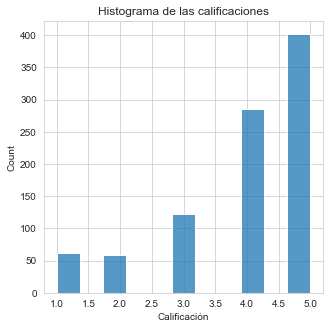

In [27]:
# Empezamos a hacer una representación gráfica de los datos que tenemos para intentar encontrar dtos interesantes
# Histograma de las calificaciones
plt.figure(figsize = (5,5))
sns.histplot(x = "Calificacion", data = BW_df[BW_df["Calificacion"] <= 5])
plt.title("Histograma de las calificaciones")
plt.xlabel("Calificación")
plt.show()

In [28]:
# Pocerntaje de calificación
TOTAL_OPINIONES = BW_df.shape[0]
for i in range(1,6):
    procentaje = BW_df[BW_df["Calificacion"] == i].shape[0] / TOTAL_OPINIONES
    print("Porcentaje con calificación {} es {:.2f}%".format(i, procentaje*100))

print("Es bueno 72.66%")
print("Debe mejorar 27.34%")

Porcentaje con calificación 1 es 6.67%
Porcentaje con calificación 2 es 6.34%
Porcentaje con calificación 3 es 13.12%
Porcentaje con calificación 4 es 30.65%
Porcentaje con calificación 5 es 43.23%
Es bueno 72.66%
Debe mejorar 27.34%


In [29]:
BW_df["Año"] = BW_df["Año"].astype(int)
BW_df["Mes"] = BW_df["Mes"].astype(int)

In [30]:
# Eliminamos la calificación ya que tenemos ahora la retroalimentación para guiarnos
BW_df.drop("Calificacion", axis = 1, inplace = True)

<AxesSubplot:>

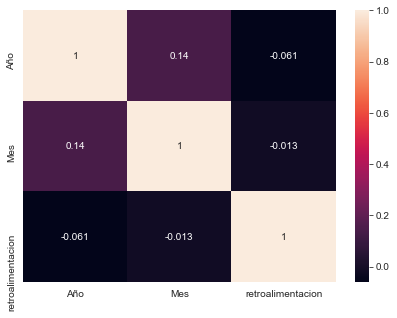

In [31]:
# Haremós un mpa de correlación para ver si hay alguna relación núemrica que aún no hayamos visto
corr = BW_df.corr()

plt.figure(figsize = (7,5))
sns.heatmap(corr, annot = True)

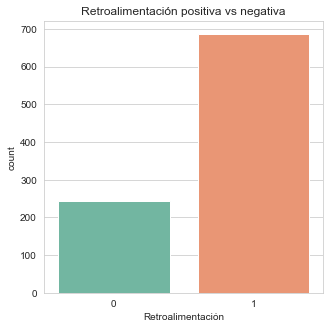

In [32]:
# Viendo de otra manera las críticas del hotel
plt.figure(figsize = (5,5))
sns.countplot(x = "retroalimentacion", data = BW_df, palette = "Set2")
plt.title("Retroalimentación positiva vs negativa")
plt.xlabel("Retroalimentación")
plt.show()

Text(0.5, 0, 'Año')

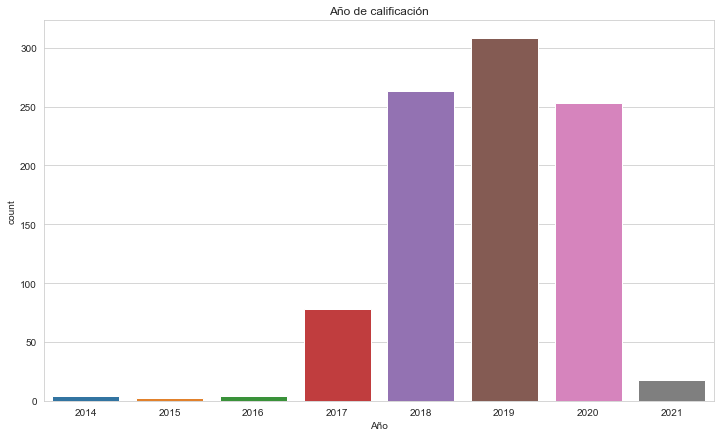

In [33]:
# ¿De que año son las criticas?
plt.figure(figsize = (12,7))
sns.countplot(x = "Año", data =  BW_df)
plt.title("Año de calificación")
plt.xlabel("Año")

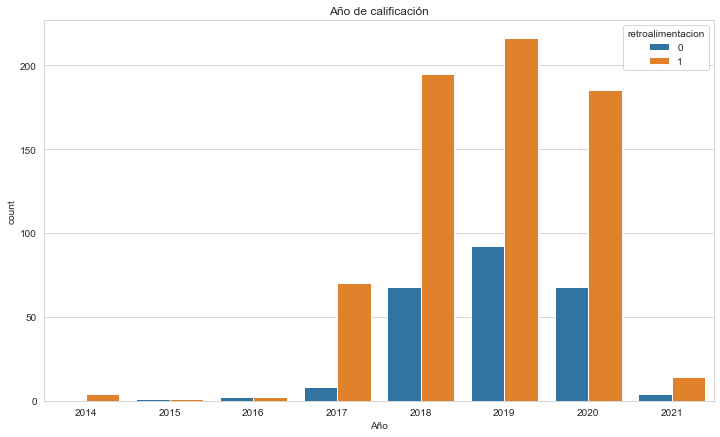

In [34]:
# ¿Hay una relevancia entre la retroalimentación y el año?
plt.figure(figsize = (12,7))
sns.countplot(x = "Año", data =  BW_df, hue = "retroalimentacion")
plt.title("Año de calificación")
plt.xlabel("Año")
plt.show()

Text(0.5, 1.0, 'Acumulación de las opiniones con respecto al año')

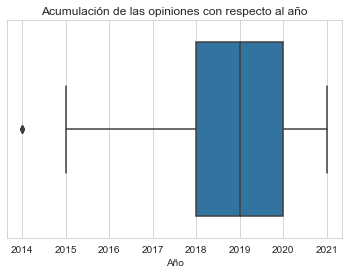

In [35]:
# Boxplot para ver en donde se acumulan las opiniones de los usuarios
sns.boxplot(x = "Año", data = BW_df)
plt.title("Acumulación de las opiniones con respecto al año")

In [36]:
# Procesamiento de los datos
# Las opiniones: Serán removidas las stopwords, los signos y lo números
# STOPWORDS
nltk.download('stopwords')
STOPWORDS_SPANISH = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP-001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# Agregamos una palabra que seguro se repetirá mucho y no es necesaria "Hotel" y "Hoteles"
STOPWORDS_SPANISH.append("hotel")
STOPWORDS_SPANISH.append("hostel")
STOPWORDS_SPANISH.append("hostal")
STOPWORDS_SPANISH.append("hoteles")
STOPWORDS_SPANISH.append("traducción")
STOPWORDS_SPANISH.append("google")
STOPWORDS_SPANISH.append("habitación")
STOPWORDS_SPANISH.append("habitaciones")

In [38]:
# CARACTERES ESPECIALES
signos = list(string.punctuation)

In [39]:
# NUMEROS
numeros = list(["0","1","2","3","4","5","6","7","8","9"])

In [40]:
opiniones = []
for phrase in BW_df["Descripción"]:
    opinion = [word for word in phrase.split() if word.lower() not in STOPWORDS_SPANISH]
    opiniones.append(" ".join(opinion))

In [41]:
new_opiniones = []
for opinion in opiniones:
    sin_signos = [char for char in opinion if char not in signos]
    new_opiniones.append("".join(sin_signos))

In [42]:
clean_opinions = []
for opinion in new_opiniones:
    sin_num = [char for char in opinion if char not in numeros]
    clean_opinions.append("".join(sin_num))

In [43]:
# Sustituirimos la variable opinion con las nuevas
BW_df["Descripción"] = clean_opinions

In [44]:
BW_df

,Descripción,Año,Mes,retroalimentacion
0,Simplemente mejores experiecias hospedaje vist...,2020,10,1
1,Atención Realmente mala recibe recepción amabl...,2020,4,0
2,Excelente gracias hospitalidad ayuda recepcion...,2021,4,1
3,cerca zocalo trato personal bueno tan bueno ve...,2021,3,1
4,Excelente atención aunque solo dure noche ub...,2021,3,1
...,...,...,...,...
925,Accesible,2018,4,1
926,gustó terraza,2018,4,1
927,siempre limpio agradable,2018,4,1
928,ambiente trato instalaciones maravillosas ubic...,2018,4,1


In [45]:
# Sepraemos las opiniones buenas de las malas
buenas = ""
malas = ""
for i, cal in enumerate(BW_df["retroalimentacion"]):
    if cal == 1:
        buenas += BW_df["Descripción"][i]
    else:
        malas += BW_df["Descripción"][i]

In [46]:
wordcloud1 = WordCloud().generate(buenas)
wordcloud2 = WordCloud().generate(malas)

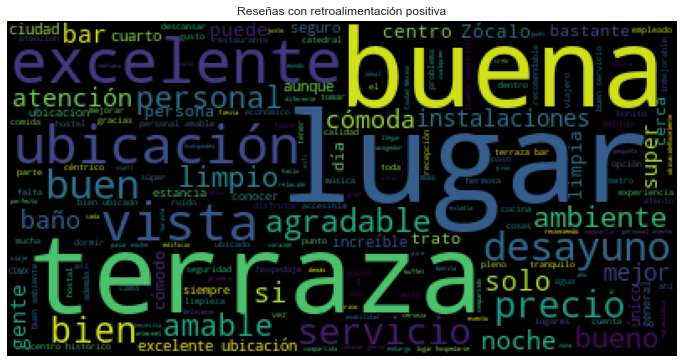

In [47]:
# Las palabras más usadas en la retroalimentación positiva
plt.figure(figsize = (12,12))
plt.imshow(wordcloud1)
plt.title("Reseñas con retroalimentación positiva")
plt.grid(False)
plt.axis(False)
plt.show()

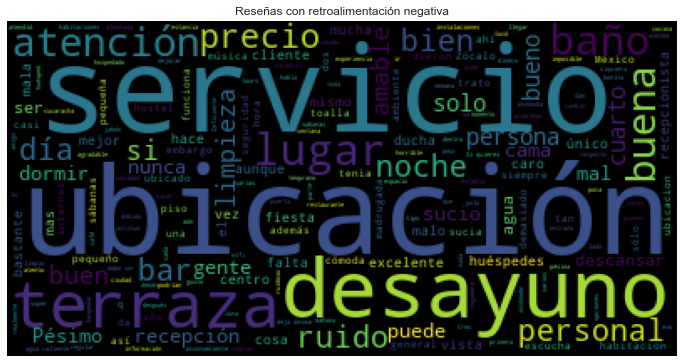

In [48]:
# Las palabras más usadas en la retroalimentación negativa
plt.figure(figsize = (12,12))
plt.imshow(wordcloud2)
plt.title("Reseñas con retroalimentación negativa")
plt.grid(False)
plt.axis(False)
plt.show()

In [49]:
# Guardamos la información pre procesada
BW_df.to_csv("MJ_preprocesado_maps.csv")